## **1. Business Understanding**

Handwritten digit recognition is a foundational computer vision task widely used in applications such as bank cheque verification, postal code recognition, digital form processing, and automated data entry systems. Achieving high accuracy in digit classification reduces human workload, improves efficiency, and enhances reliability in real-world digit recognition systems.

The **MNIST dataset** is the most widely used benchmark for handwritten digit classification, containing grayscale images of digits (0–9). Each sample includes:

- 1 label column (digit class 0–9)
- 784 pixel intensity features (28 × 28 flattened image)

In this task, machine learning—specifically **XGBoost**, one of the most powerful modern ensemble methods—is used to build a highly accurate digit recognizer. The goal is to train, fine-tune, evaluate, and compare the classifier against baseline and boosting models.



---

## **2. Problem Statement**

The objective of this question is to design an **XGBoost ensemble classifier** capable of accurately recognizing handwritten digits from the MNIST dataset. The tasks include:

1. Training an XGBoost classifier on the MNIST training dataset (`mnist_train.csv`).
2. Fine-tuning key hyperparameters (learning rate, max_depth, n_estimators) and justifying the tuning decisions.
3. Evaluating the trained model using accuracy, precision, recall, and F1-score.
4. Comparing the XGBoost classifier with several baseline and ensemble models such as:
   - Logistic Regression
   - Decision Tree Classifier
   - Adaptive Boosting (AdaBoost)
   - Gradient Boosting Machines (GBM)
5. Saving the trained model as **model_3.pkl**.


## **Objectives**

### **Primary Objective**
To train and fine-tune an **XGBoost classifier** for handwritten digit recognition and save it as **model_3.pkl**.



### **Secondary Objectives**  
- Hyperparameter Tuning  
- Model Evaluation  
- Model Comparison  
- Result Discussion  
- Conclusion  
- Expected Deliverables

### **Importing the necessary libraries**

In [1]:
import os, time, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
# put this in your imports cell (or run it before GridSearch)
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
TRAIN_PATH = "C:/Users/UNETS COMPUTERS/Machine learning class-BSCS-3/ML_EXAM/Question3/mnist_train.csv"
TEST_PATH  = "C:/Users/UNETS COMPUTERS/Machine learning class-BSCS-3/ML_EXAM/Question3/mnist_test.csv"
OUT_DIR = "/mnt/data"
os.makedirs(OUT_DIR, exist_ok=True)

In [3]:
# load CSVs (first column = label)
def load_mnist_csv(path):
    df = pd.read_csv(path)
    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values
    return X, y, df

In [4]:
#print the first 5 rows of the training data
X_train, y_train, df_train = load_mnist_csv(TRAIN_PATH)
print("First 5 rows of training data:")
print(df_train.head())
print(df_train.tail())

First 5 rows of training data:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
59995      8    0    0    0    0    0    0    0 

In [5]:
#print the first 5 rows of the testing data
print("First 5 rows of the testing data:")
X_test, y_test, df_test = load_mnist_csv(TEST_PATH)
print(df_test.head())
print(df_test.tail())



First 5 rows of the testing data:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
9995      2    0    0    0    0    0    0    0

In [6]:
# ...existing code...
# replace the cell that currently does: X_train, y_train = load_mnist_csv(TRAIN)
# and X_test,  y_test  = load_mnist_csv(TEST)
X_train, y_train, train_df = load_mnist_csv(TRAIN_PATH)
X_test,  y_test,  test_df  = load_mnist_csv(TEST_PATH)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
# ...existing code...

Train shape: (60000, 784) Test shape: (10000, 784)


In [7]:
#check for missing values for both training and testing data
print("Missing values in training data:\n", train_df.isnull().sum())
print("Missing values in testing data:\n", test_df.isnull().sum())

Missing values in training data:
 label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64
Missing values in testing data:
 label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


In [ ]:
import os

# Boxplot-based outlier check for training and testing data
# Uses existing train_df and test_df (first column = label), OUT_DIR available

pixel_cols = train_df.columns[1:]  # all pixel columns
np.random.seed(42)
sample_cols = list(np.random.choice(pixel_cols, size=20, replace=False))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1) Overall distribution (flattened pixel values) - train vs test
sns.boxplot(data=[train_df[pixel_cols].values.flatten(),
                  test_df[pixel_cols].values.flatten()],
            ax=axes[0])
axes[0].set_xticklabels(['Train (all pixels)', 'Test (all pixels)'])
axes[0].set_title('Overall pixel-value distributions (flattened)')

# 2) Per-feature boxplots for a random subset (training)
train_df[sample_cols].boxplot(ax=axes[1], rot=90)
axes[1].set_title('Train: boxplot for 20 random pixels (columns)')

# 3) Per-feature boxplots for the same subset (testing)
test_df[sample_cols].boxplot(ax=axes[2], rot=90)
axes[2].set_title('Test: boxplot for same 20 pixels')

plt.tight_layout()
out_path = os.path.join(OUT_DIR, "mnist_boxplots.png")
fig.savefig(out_path, dpi=150)
print(f"Saved boxplots to: {out_path}")
plt.show()

# Compute per-feature outlier counts using IQR rule and report top features
def per_feature_outlier_counts(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[cols] < lower) | (df[cols] > upper)).sum()
    pct = (outliers / df.shape[0]) * 100
    return pd.DataFrame({"outliers": outliers, "pct_outliers": pct}).sort_values("outliers", ascending=False)

print("\nTop 10 pixel columns with most outliers (train):")
print(per_feature_outlier_counts(train_df, pixel_cols).head(10))

print("\nTop 10 pixel columns with most outliers (test):")
print(per_feature_outlier_counts(test_df, pixel_cols).head(10))

In [8]:
# XGBoost: initial baseline training (use GPU if available by setting tree_method='gpu_hist')
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_jobs=-1, random_state=42,
                    learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0, colsample_bytree=1.0)

In [9]:
# Stratified CV for GridSearch
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [4, 6, 8],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid = GridSearchCV(xgb, param_grid, cv=skf, scoring="accuracy", n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

In [11]:
# 1) Quick sanity checks
print("X_train shape, dtype:", getattr(X_train, "shape", None), getattr(X_train, "dtype", None))
print("y_train shape, dtype:", getattr(y_train, "shape", None), getattr(y_train, "dtype", None))
print("Unique labels:", np.unique(y_train), "count:", len(np.unique(y_train)))

# 2) Subsample safely (20% train_size)
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=0.2, stratify=y_train, random_state=42)
print("X_sub shape:", X_sub.shape, "y_sub shape:", y_sub.shape)

# 3) Use CPU-friendly XGBoost (remove gpu_hist unless you have a working GPU + drivers)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss",
                    n_jobs=4, random_state=42, tree_method="hist",
                    learning_rate=0.1, max_depth=6, n_estimators=200,
                    subsample=1.0, colsample_bytree=1.0)

# 4) Smaller param grid and RandomizedSearch to reduce load
param_grid = {
    "learning_rate": [0.05, 0.1],
    "max_depth": [4, 6],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
search = RandomizedSearchCV(xgb, param_grid, n_iter=12, cv=skf, scoring="accuracy",
                            n_jobs=2, verbose=2, random_state=42)

# 5) Run inside try/except and print full traceback on error
try:
    print("Starting RandomizedSearchCV...")
    search.fit(X_sub, y_sub)
    best = search.best_estimator_
    print("Best params:", search.best_params_)
    print("Best CV score:", search.best_score_)
    # Retrain best on full training set
    print("Retraining best model on full training set...")
    best.fit(X_train, y_train)
    y_pred = best.predict(X_test)
    print("Test accuracy:", accuracy_score(y_test, y_pred))
except Exception as e:
    print("Search failed with exception:")
    traceback.print_exc()

X_train shape, dtype: (60000, 784) int64
y_train shape, dtype: (60000,) int64
Unique labels: [0 1 2 3 4 5 6 7 8 9] count: 10
X_sub shape: (12000, 784) y_sub shape: (12000,)
Starting RandomizedSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV score: 0.9493333333333333
Retraining best model on full training set...
Test accuracy: 0.9781


In [12]:
# Save model (for part a)
import joblib
joblib.dump(best, 'model_3.pkl')

# For testing (load mnist_test.csv and evaluate as per question)
test_df = pd.read_csv('mnist_test.csv')
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values
y_pred = best.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Test accuracy: 0.9781


XGBoost Test accuracy: 0.9781
Classification Report:
               precision    recall  f1-score   support

           0     0.9778    0.9898    0.9838       980
           1     0.9886    0.9921    0.9903      1135
           2     0.9701    0.9738    0.9720      1032
           3     0.9802    0.9792    0.9797      1010
           4     0.9806    0.9766    0.9786       982
           5     0.9820    0.9776    0.9798       892
           6     0.9812    0.9802    0.9807       958
           7     0.9765    0.9689    0.9727      1028
           8     0.9744    0.9754    0.9749       974
           9     0.9692    0.9663    0.9677      1009

    accuracy                         0.9781     10000
   macro avg     0.9780    0.9780    0.9780     10000
weighted avg     0.9781    0.9781    0.9781     10000



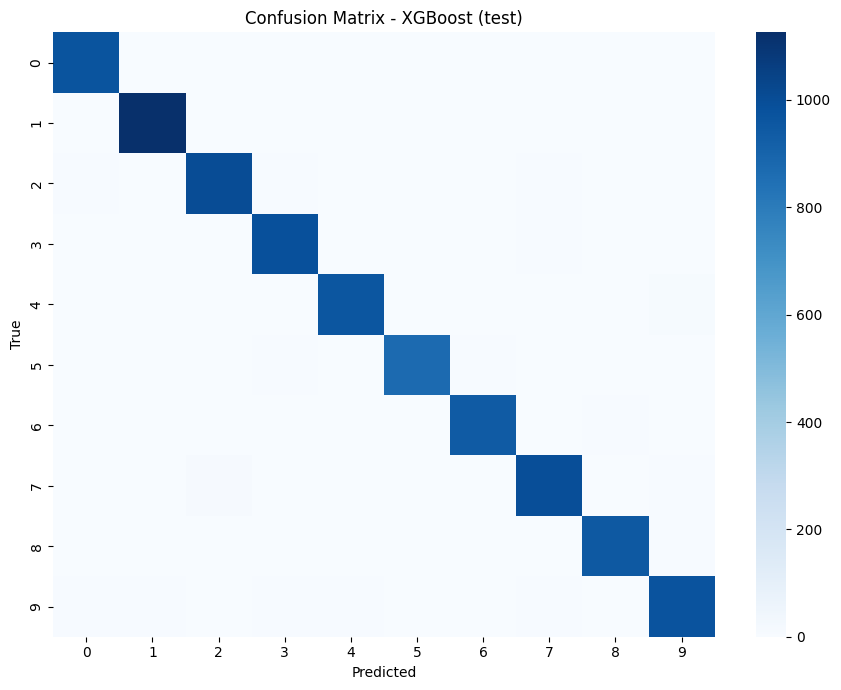

In [13]:
# === Evaluate on test set ===
y_pred = best.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Test accuracy: {acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost (test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR, "confusion_matrix_xgb.png"), dpi=150)
plt.close()

In [14]:
# ROC AUC (multiclass one-vs-rest macro)
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))
y_score = best.predict_proba(X_test)
# compute macro ROC AUC
fpr = dict(); tpr = dict(); roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


Saved ROC AUC plot to: /mnt/data\roc_auc_macro.png


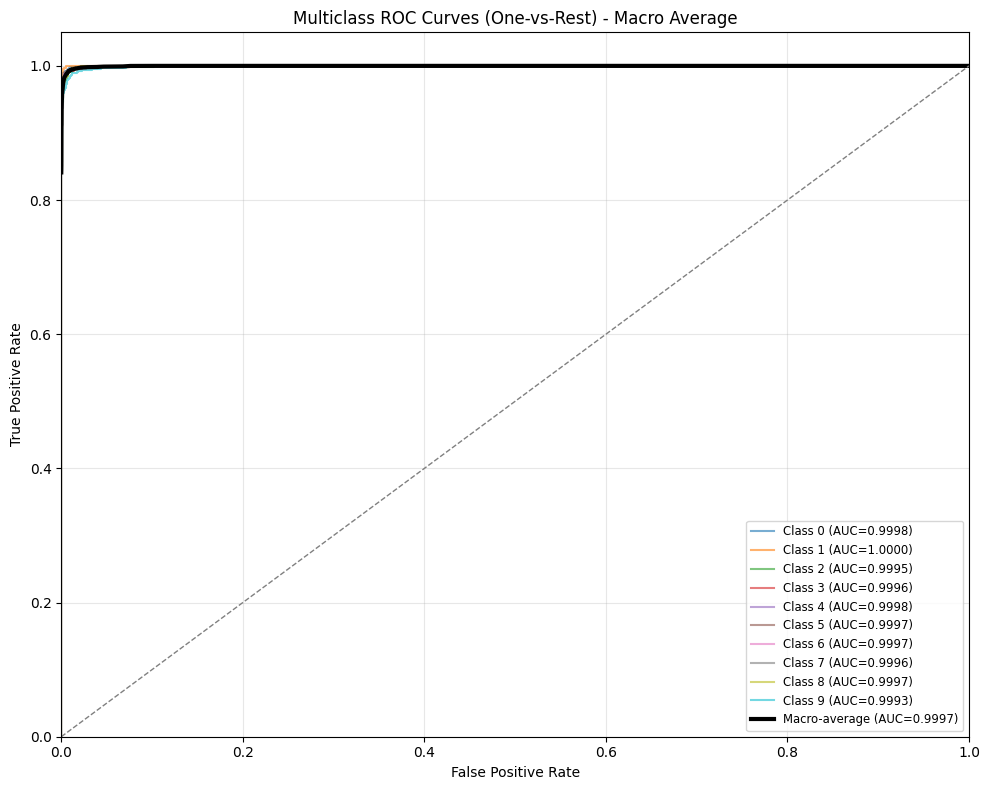

In [15]:
# Plot multiclass ROC curves (one-vs-rest) and macro-average
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap("tab10")

# per-class ROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             color=cmap(i % 10),
             lw=1.5, alpha=0.6,
             label=f"Class {i} (AUC={roc_auc[i]:.4f})")

# macro-average ROC
plt.plot(fpr["macro"], mean_tpr, color="black", lw=3,
         label=f"Macro-average (AUC={roc_auc['macro']:.4f})")

# chance line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves (One-vs-Rest) - Macro Average")
plt.legend(loc="lower right", fontsize="small", ncol=1)
plt.grid(alpha=0.3)

out_path = os.path.join(OUT_DIR, "roc_auc_macro.png")
plt.tight_layout()
plt.savefig(out_path, dpi=150)
print(f"Saved ROC AUC plot to: {out_path}")
plt.show()

In [16]:
baseline_models = {
    "LogisticRegression": LogisticRegression(max_iter=300, solver='saga', multi_class='multinomial', n_jobs=-1, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [17]:
summary = []
for name, model in baseline_models.items():
    print(f"\nTraining baseline: {name} ...")
    t0 = time.time()
    model.fit(X_train, y_train)
    t1 = time.time()
    y_pred_m = model.predict(X_test)
    acc_m = accuracy_score(y_test, y_pred_m)
    report = classification_report(y_test, y_pred_m, output_dict=True)
    summary.append({
        "model": name,
        "accuracy": acc_m,
        "precision_macro": report['macro avg']['precision'],
        "recall_macro": report['macro avg']['recall'],
        "f1_macro": report['macro avg']['f1-score'],
        "train_time_sec": t1 - t0
    })


Training baseline: LogisticRegression ...

Training baseline: DecisionTree ...

Training baseline: AdaBoost ...

Training baseline: GradientBoosting ...
